# WAIC / WBIC / 渡辺ベイズ理論

## 概要

- 正則でないモデル（例えばDeep Learningのような複雑なモデル）でも使えるようにAICを一般化したのがWAIC
- そのように一般化したベイズが渡辺ベイズ
- 代数幾何学を利用する

### KL情報量

$$
D(q\| p) = E_X \left[
\log \frac{ q(X) }{ p(X|\theta) }
\right]
= \int_{\mathcal{X}}
 q(x) \log \frac{q(X)}{p(X|\theta)} dx \geq 0
$$

$$
K(\theta) := E_X \left[
\log \frac{ p(X|\theta_*) }{ p(X|\theta) }
\right]
$$

## 正則性

$K(\theta)=0$となる$\theta$の集合を$\Theta_*$とする。

以下3つの条件を満たすとき、正則であるという

1. $\Theta_*$の要素$\theta_*$が単一
2. $\theta$のヘッセ行列

## 正則性

以下2つを満たすとき$q(x)$は$p(x|\theta)$に対して正則であるという

1. 平均対数損失関数を最小にするパラメータの集合$\Theta^* = \{ \theta \in \Theta | L(\theta) が最小値をとる \}$について、集合$\Theta^*$の要素が$\theta^*$の1つだけである
2. $\theta^*$のヘッセ行列$\nabla^2 L(\theta^*)$が正則（固有値が全て正の値）である




### 正則でない関数の例

- 最適解が複数→凸でない
- 2回微分できない

$$
f(x) = x^4\\
f'(x) = 4 x^3\\
f''(x) = 12 x^2
$$

$f(x) = x^4$は$f''(0)=0$で


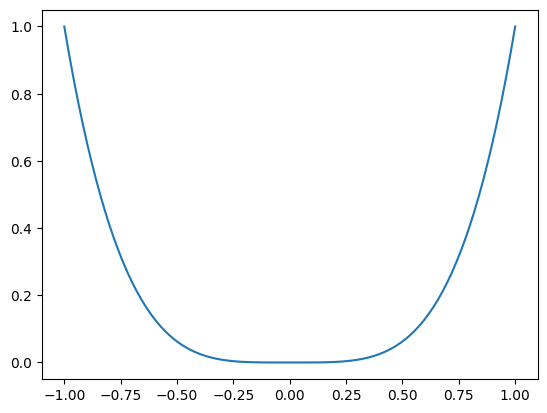

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
y = x**4

plt.plot(x, y)

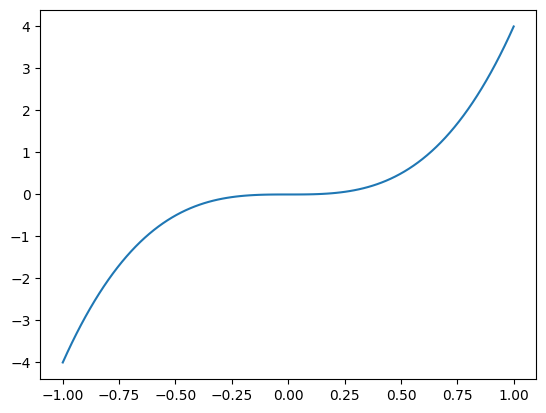

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
y = 4*x**3

plt.plot(x, y)

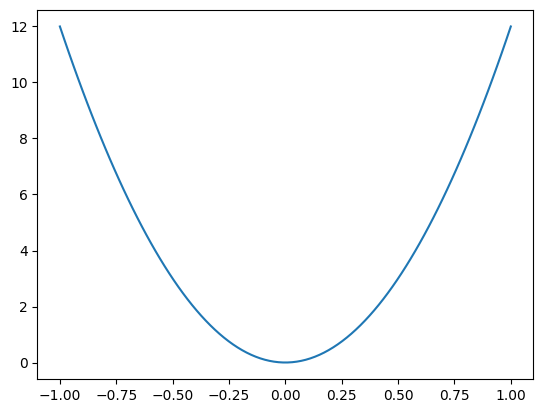

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
y = 12*x**2

plt.plot(x, y)

### 正則でない統計モデルの例

- 混合正規分布

$$
P(x|a,b) = (1-a) \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right)
+ a \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{(x-b)^2}{2}\right)
$$

で最適解が$a_* b_* =0$のとき、KL情報量を最小化する$\theta=(a,b)\in\Theta$が一意に決まらない


### 正則性を仮定すると得られるもの

#### ニュートン法の確率収束

最尤推定のときに使われることが多いニュートン法でヘッセ行列が逆行列を持たず、漸化式が収束しない

$$
\theta_n \to \theta_*
$$


#### 漸近正規性

$$
p\left(\theta \mid x_1, \ldots, x_n\right) \stackrel{\text { 法則収束 }}{\longrightarrow} N\left(\theta_*+\Delta_n, \frac{1}{n} J^{-1}\right)
$$

法則収束：分布関数Fの連続点xで分布関数$F_n(x)$が$F(x)$に収束する（$n\to \infty$）





## 事後平均、事後分散

渡辺ベイズで出てくる大事な量

$p(x|\theta)$の事後平均（予測分布）
$$
r\left(x \mid x_1, \ldots, x_n\right)=\int_{\Theta}\{p(x \mid \theta)\} p\left(\theta \mid x_1, \ldots, x_n\right) d \theta
$$
$-\log p(x|\theta)$の事後平均、事後分散
$$
\begin{aligned}
\mathcal{E}(x) & :=\int_{\Theta}\{-\log p(x \mid \theta)\} p\left(\theta \mid x_1, \ldots, x_n\right) d \theta \\
\mathcal{V}(x) & :=\int_{\Theta}\{-\log p(x \mid \theta)-\mathcal{E}(x)\}^2 p\left(\theta \mid x_1, \ldots, x_n\right) d \theta
\end{aligned}
$$


## 汎化損失

### 汎化損失

予測分布を負の対数とって期待値とる
$$
G_n :=\mathbb{E}_X\left[-\log r\left(X \mid x_1, \ldots, x_n\right)\right]
$$

### 経験損失

$$
T_n :=\frac{1}{n} \sum_{i=1}^n\left\{-\log r\left(x_i \mid x_1, \ldots, x_n\right)\right\}
$$


### 正則性を仮定しなくても、次のようになる

$$
\begin{aligned}
G_n & =\mathbb{E}_X[\mathcal{E}(X)]-\frac{1}{2} \mathbb{E}_X[\mathcal{V}(X)]+o_P\left(\frac{1}{n}\right) \\
T_n & =\frac{1}{n} \sum_{i=1}^n \mathcal{E}\left(x_i\right)-\frac{1}{2 n} \sum_{i=1}^n \mathcal{V}\left(x_i\right)+o_P\left(\frac{1}{n}\right)
\end{aligned}
$$



## WAIC

WAIC = 経験損失$T_n$+事後分散の平均値$V_n/n$
$$
\begin{gathered}
\mathcal{E}(x)=\int_{\Theta}\{-\log p(x \mid \theta)\} p\left(\theta \mid x_1, \ldots, x_n\right) d \theta \\
\mathcal{V}(x)=\int_{\Theta}\{-\log p(x \mid \theta)-\mathcal{E}(x)\}^2 p\left(\theta \mid x_1, \ldots, x_n\right) d \theta \\
V_n:=\sum_{i=1}^n \mathcal{V}\left(x_i\right) \\
W A I C:=T_n+\frac{V_n}{n}
\end{gathered}
$$


### 相対的に有限な分散の範囲内でしかWAICは使えない

（100問の本7章）

#### 実現可能

$D(q\| p)=0$となる$\theta$が存在するとき、qは$\{p(\cdot|\theta)\}_{\theta\in\Theta}$で実現可能という

#### 実質的にunique（同質）

$$
p(x \mid \theta)=p\left(x \mid \theta^{\prime}\right), 
x \in \mathcal{X}, \theta, \theta^{\prime} \in \Theta_*
$$

#### 相対的に有限な分散をもつ

$$
あるc>0が存在して、
\mathbb{E}_X\left[\left\{\log \frac{p\left(X \mid \theta_*\right)}{p(X \mid \theta)}\right\}^2\right] \leq c \mathbb{E}_X\left[\log \frac{p\left(X \mid \theta_*\right)}{p(X \mid \theta)}\right], \theta \in \Theta, \theta_* \in \Theta_*
$$

正則でないモデルであってもWAICは使えるが、**相対的に有限な分散の範囲内でしかWAICは使えない**


### 正則のとき、$AIC\approx WAIC$

正則のとき、漸近正規性から
$$
\begin{aligned}
G_n & =\mathbb{E}_X\left[-\log p\left(X \mid \theta_*\right)\right]+\frac{1}{2} \Delta_n^{\top} J \Delta_n \\
T_n & =\frac{1}{n} \sum_{i=1}^n-\log p\left(x_i \mid \theta_*\right)-\frac{1}{2} \Delta_n^{\top} J \Delta_n
\end{aligned}
$$
AICとの対応
$$
\begin{aligned}
\mathbb{E}_X\left[-\log p\left(X \mid \hat{\theta}\left(x_1, \ldots, x_n\right)\right)\right] & =\mathbb{E}_X\left[-\log p\left(X \mid \theta_*\right)\right]+\frac{1}{2} \Delta_n^{\top} J \Delta_n \\
\sum_{i=1}^n-\log p\left(x_i \mid \hat{\theta}\left(x_1, \ldots, x_n\right)\right) & =\frac{1}{n} \sum_{i=1}^n-\log p\left(x_i \mid \theta_*\right)-\frac{1}{2} \Delta_n^{\top} J \Delta_n
\end{aligned}
$$


## 「渡辺ベイズはベイズじゃない」という批判

> こういう本がでるのはいいことだけど、またこういう間違った認識が広がるのは辟易する。WAIC/WBICは頻度論だから。
>
> https://twitter.com/kenmcalinn/status/1705383267405615173